<a href="https://colab.research.google.com/github/RaimundoLorca/roboticafcfm2021-2/blob/main/Auxiliar_1/Auxiliar_1_Pauta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Color Segmentation

La segmentación, si bien bajo muchos aspectos consiste en una operación bastante simple, es un proceso bastante útil a la hora de desarrollar algoritmos de detección de objetos o tracking. En términos simples, segmentar una imagen consiste en seccionar o aislar zonas de una imagen en función de algún atributo, como por ejemplo, intensidad o color.

En este tutorial aprenderá los primeros pasos en cuanto a procesamiento de imágenes, desde cargar las imágenes como arreglos numéricos, hasta manipular sus valores mediante filtros y segmentadores.

<img src="https://raw.githubusercontent.com/RaimundoLorca/roboticafcfm2021-2/main/bin/Karasuno_ready.png" height="300">



## OpenCV

La Open Source Computer Vision es una librería especializada en herramientas de visión computacional y en todo lo que respecta a visión artificial en general. De este modo provee de funcionalidades de todo tipo de complejidad, desde operaciones básicas de procesamiento de imágenes, hasta algoritmos de reconocimiento de objetos.

Por supuesto, esta librería cuenta con su documentación correspondiente. En esta puede encontrar descripciones más detalladas de sus funcionalidades, así como también ejemplos, tutoriales y otros.

https://docs.opencv.org/master/

<img src="https://raw.githubusercontent.com/cherrerab/roboticafcfm/master/auxiliar_01/bin/opencv_logo.png" height="200">

##Cargar repositorio Github

La imagen con que trabajaremos en este taller se encuentra en el repositorio del curso, de este modo lo primero que haremos será clonar este github.

In [122]:
!git clone https://github.com/RaimundoLorca/roboticafcfm2021-2.git
%cd /content/roboticafcfm2021-2

fatal: destination path 'roboticafcfm2021-2' already exists and is not an empty directory.
/content/roboticafcfm2021-2


##Cargar imagen

Para cargar las imagenes con OpenCV, se utiliza la función `cv2.imread`, la cual necesita la ubicación del archivo con el que estamos trabajando. En este caso, el path es `"//content//roboticafcfm2021-2//Auxiliar_1//Karasuno.jpg"`.

In [123]:
#Cargar librerias a usar
import cv2
import numpy as np
import matplotlib.pyplot as plot

#Cargar imagen
img = cv2.imread("//content//roboticafcfm2021-2//Auxiliar_1//Karasuno.jpg")

#Printea el tipo y las dimensiones de la imagen
print('type(img):', type(img))
print('\nimg.shape:', img.shape)
print('\nimg.dtype:', img.dtype)

type(img): <class 'numpy.ndarray'>

img.shape: (735, 1250, 3)

img.dtype: uint8


Interpretando la información de forma mas clara:

*   Nuestra imagen es del tipo `np.array` y está compuesta por 3 dimensiones, en donde cada una corresponde a un canal (Red, Green y Blue).
*   Cada uno de los valores que componen el arreglo de matrices es del tipo `uint8`, en otras palabras, valores enteros positivos de 8-bits.
*   El tamaño `(735, 1250, 3)` indica que la imagen tiene un `height` de 735 px, un `width` de 1250 px, y 3 `channels` BGR. En resumen, el tamaño equivale a (cantidad de filas, cantidad de columnas, cantidad de canales).

Es importante notar que los canales que entrega la función cv2.imread están en `BGR`, no en `RGB`. Para visualizar esto, utilizaremos la librería `matplotlib`.

(-0.5, 1249.5, 734.5, -0.5)

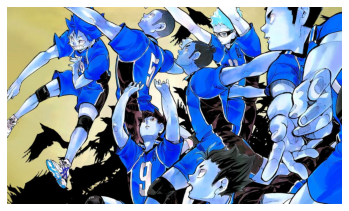

In [124]:
#Plotear imagen con Matplotlib
plot.figure()
plot.imshow(img)
plot.axis("off")

Para arreglar esto, debemos reordenar los canales, esto se logra utlizando la función `cv2.cvtColor`, la cual permite transformar el `colorspace` de una imagen directamente a otro. Dado que en este caso queremos pasar de BGR a RGB, utilizaremos el código `cv2.COLOR_BGR2RGB`.

(-0.5, 1249.5, 734.5, -0.5)

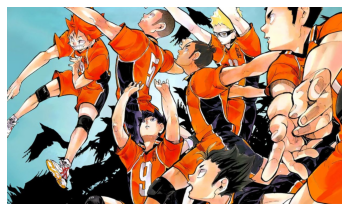

In [125]:
#Cambiar espacio de colores (BGR A RGB)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Plotear imagen con Matplotlib
plot.figure()
plot.imshow(img_rgb)
plot.axis("off")

##Segmentando con HSV

La segmentación por color consiste en binarizar una imagen, obteniendo una imagen en blanco y negro, en donde el área en blanco corresponde al objeto de interés. Esto se logra considerando un rango específico en base a la rueda de color. De este modo, aquellos pixeles cuyos valores se encuentren dentro del rango pasarán a `255` (blanco), mientras que aquellos que no, a `0` (negro).

Pero, cómo determinamos este rango?

La estrategia más directa es hacerlo al ojímetro y ajustar mediante ensayo y error. Pero el método más confiable, o sistemático, es utilizar histrogramas. Siguiendo este método, primero transformaremos la imagen a HSV utilizando `cv2.cvtColor`, y luego generaremos su histograma de valores `HUE` mediante `plot.hist`.

(-0.5, 1249.5, 734.5, -0.5)

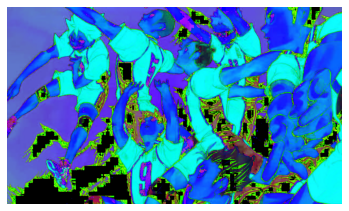

In [126]:
#Cambiar espacio de colores (RGB A HSV)
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

#Plotear imagen con Matplotlib
plot.figure()
plot.imshow(img_hsv)
plot.axis("off")

Text(0, 0.5, 'Frecuencia')

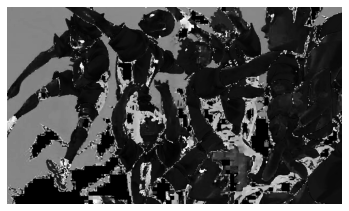

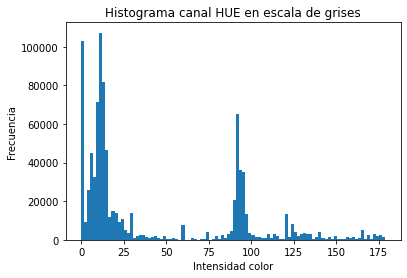

In [127]:
#Obtener el canal Hue
img_hue = img_hsv[:, :, 0] 

#Plotear imagen con Matplotlib
plot.figure()
plot.imshow(img_hue, cmap='gray')
plot.axis("off")

#Se convierte la matriz de la imagen a un vector
img_flat = img_hue.flatten()

#Plotear histograma con Matplotlib
plot.figure()
plot.hist(img_flat, 100)
plot.title('Histograma canal HUE en escala de grises')
plot.xlabel('Intensidad color')
plot.ylabel('Frecuencia')

Podemos notar del histograma que existen dos zonas que concentran los valores `HUE` dentro de la imagen. La primera es la que se encuentra centrada en `90` que, mediante ensayo y error, se determina que corresponde al color azúl y por lo tanto, representan los pixeles que conforman el cielo en la imagen.

Ahora, la zona que más nos interesa es la que se encuentra en torno a `15`. Este rango se corresponde con el color naranjo.

Teniendo estos valores en cuenta, ahora podemos definir un rango para realizar la segmentación. Para esto, utilizaremos la función `cv2.inRange` la cual binarizará la imagen a partir de los límites que le entreguemos.

(-0.5, 1249.5, 734.5, -0.5)

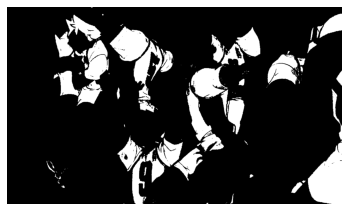

In [128]:
#Definir límite inferior
lower_hsv = np.array( [0, 200, 200] )

#Definir límite superior
upper_hsv = np.array( [25, 255, 255] )

#Segmentar mediante cv2.inRange
mask = cv2.inRange(img_hsv, lower_hsv, upper_hsv)

#Plotear imagen con Matplotlib
plot.figure()
plot.imshow(mask, cmap='gray')
plot.axis("off")

##Eliminación de ruido

Si bien hemos logrado un buen resultado, se podría decir que este no es muy limpio. Este `mask` tiene bastante ruido. Podemos controlar esto si aplicamos previamente un filtro gaussiano sobre la imagen, mediante `cv2.GaussianBlur`.

(-0.5, 1249.5, 734.5, -0.5)

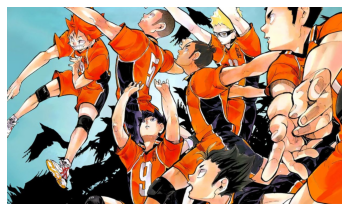

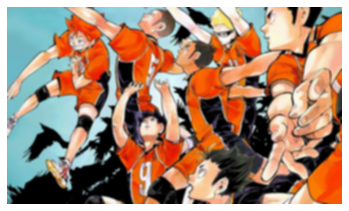

In [129]:
#Se aplica un filtro gaussiano (las dimensiones del kernel deben ser positivas e impares)
img_blur = cv2.GaussianBlur(img_rgb, (11,11), 5)

#Plotear imagen con Matplotlib
plot.figure()
plot.imshow(img_rgb)
plot.axis("off")

#Plotear imagen con Matplotlib
plot.figure()
plot.imshow(img_blur)
plot.axis("off")

(-0.5, 1249.5, 734.5, -0.5)

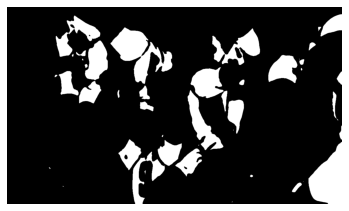

In [130]:
#Cambiar espacio de colores (RGB A HSV)
hsv_blur = cv2.cvtColor(img_blur, cv2.COLOR_RGB2HSV)

#Segmentar mediante cv2.inRange
clean_mask = cv2.inRange(hsv_blur, lower_hsv, upper_hsv)

#Plotear imagen con Matplotlib
plot.figure()
plot.imshow(clean_mask, cmap='gray')
plot.axis("off")

#Bonus track

Una vez tenemos nuestra imagen binarizada, se puede rescatar la información de los canales RGB del área segmentada. Esto se logra multiplicando cada uno de los canales por la máscara, obteniendo una imagen con los colores originales solo en el área de interés.

(-0.5, 1249.5, 734.5, -0.5)

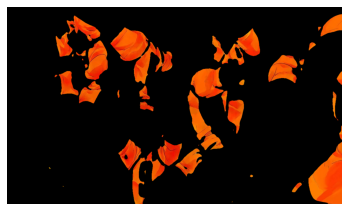

In [131]:
#Normalizar valores para que queden 0 o 1
clean_mask_normalized = clean_mask/255    

#Multiplicar máscara con imagen original
img_mask = np.zeros_like(img)

for c in range(img_mask.shape[2]):
  img_mask[:,:,c] = np.multiply(img_rgb[:,:,c], clean_mask_normalized)

#Plotear imagen con Matplotlib
plot.figure()
plot.imshow(img_mask)
plot.axis("off")